In [24]:
# !gdown https://drive.google.com/drive/folders/1CnP9h64pcYvTx0yW_hTNSuUSyrJr_Gx_?usp=sharing

/usr/local/lib/python3.7/dist-packages/gdown/parse_url.py:39: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  url="https://drive.google.com/uc?id={}".format(file_id)
Downloading...
From: https://drive.google.com/drive/folders/1CnP9h64pcYvTx0yW_hTNSuUSyrJr_Gx_?usp=sharing
To: /content/1CnP9h64pcYvTx0yW_hTNSuUSyrJr_Gx_?usp=sharing
895kB [00:00, 73.7MB/s]


<!-- !unzip /content/1CnP9h64pcYvTx0yW_hTNSuUSyrJr_Gx_?usp=sharing -->

In [5]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import cv2
import os
from tqdm import tqdm
import PIL

In [6]:
# from google.colab import drive
# drive.mount("/content/gdrive")

In [7]:
# import os
# for dirname, _, filenames in os.walk('/home/snekha/datasets/images'):
#     for filename in filenames:
#         os.path.join(dirname, filename)

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
# !pip3 install tqdm

In [10]:
DATADIR = '/home/snekha/datasets/Cleaned_data'
CATEGORIES = ['healthy','depressed']
IMG_SIZE=100

In [11]:
import pathlib  
data_dir = pathlib.Path("/home/snekha/datasets/Cleaned_data")

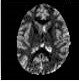

In [12]:
depressed = list(data_dir.glob('depressed/*'))
PIL.Image.open(str(depressed[2]))

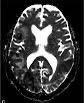

In [13]:
healthy = list(data_dir.glob('healthy/*'))
PIL.Image.open(str(healthy[0]))

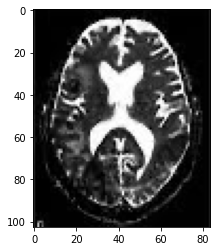

In [14]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [15]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [16]:
print(len(training_data))

500


In [17]:
lenofimage = len(training_data)

In [18]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [19]:
# categories

In [20]:
X.shape

(500, 30000)

In [21]:
X = X/255.0

In [22]:
X[1]

array([0.02352941, 0.02352941, 0.02352941, ..., 0.02352941, 0.02352941,
       0.02352941])

In [23]:
y=np.array(y)

In [24]:
y.shape

(500,)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.24, random_state=40, stratify=y)

In [42]:
from sklearn.svm import SVC
svc = SVC(C=100, kernel='poly', degree=4.0, gamma=0.1, coef0=0.8, shrinking=True, probability=False, 
          tol=1.0, cache_size=200, class_weight='balanced',max_iter=-1, 
          decision_function_shape='ovr', break_ties=False, random_state=40)
svc.fit(X_train, y_train)

SVC(C=100, class_weight='balanced', coef0=0.8, degree=4.0, gamma=0.1,
    kernel='poly', random_state=40, tol=1.0)

In [43]:

y2 = svc.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.75


In [45]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.73      0.70      0.72        54
           1       0.76      0.79      0.78        66

    accuracy                           0.75       120
   macro avg       0.75      0.75      0.75       120
weighted avg       0.75      0.75      0.75       120



In [46]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [47]:
result

,original,predicted
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
115,0,0
116,1,0
117,1,1
118,1,1


In [49]:
import pickle
pickle.dump(svc, open('image.pkl','wb'))

In [52]:
# data1= cv2.imread('image.jpg')
# # data1 = data1.astype(float)
# svc.predict(data1)

[ WARN:0@1243.822] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('image.jpg'): can't open/read file: check file path/integrity


ValueError: Expected 2D array, got scalar array instead:
array=nan.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.